<a href="https://colab.research.google.com/github/dioschuarz/data_vis/blob/main/Retail_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

- A substantial increase in e-commerce sales in the
second quarter of 2020. Analyze the evolution of sales and
sales over the months.

# New customers

- A customer is considered active if he made a purchase in the month
rated. Analyze the evolution of the number of active customers month by month.
- A customer is considered new if he has never made purchases
previously, or your last purchase was more than 180
days. Analyze the evolution of the number of new ones month by month.
- What is the marketing channel that generated the most orders in e-commerce in
2020? What was the revenue and margin of orders generated by each channel?
- Analyzing the investment of each channel, what would be your recommendation
to the board on the allocation of resources by channel?

# Recurrence

- At the end of 2020, the company launched a loyalty program for
increase customer recurrence, that is, stimulate new purchases
existing customers.
- Based on historical orders by customer profiles (age, location
geographic and assumed income), for which customers the Store should
target your loyalty campaigns?


# Margin

- Analyze the average margin of each item sold and also of each order
accomplished. Remembering that the margin consists of the revenue obtained minus the
costs involved (freight, cost of goods and taxes)
PS.: For the sake of simplicity, it is considered that taxes cost around 27.25% of revenue.

- As the last growth lever, the company wants to withdraw from the line
products that bring less margin and increase the dissemination of
product lines that are more profitable. According to your analyses,
what would be your recommendation to the product team?

# Import libraries

In [ ]:
!pip install matplotlib==3.4.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sqlalchemy as sqla

/home/ds/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import files

In [ ]:
## Traffic over channels

traffic = pd.read_csv(os.getcwd()+os.sep+'data'+os.sep+'ORIGEM_TRAFEGO.csv',
                      sep=';')

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  151600 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


It looks have some null values, let's see ater if we can drop them or how we need to clean

In [ ]:
## Media spendings

media_spend = pd.read_excel(os.getcwd()+os.sep+'data'+os.sep+'Gasto com M¡dia.xlsx')

In [ ]:
media_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dia           456 non-null    datetime64[ns]
 1   Facebook Ads  456 non-null    float64       
 2   Google Ads    456 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 KB


It looks like pretty good!

In [ ]:
## Customer database

customers = pd.read_parquet(os.getcwd()+os.sep+'data'+os.sep+'cadastro_clientes.parquet')

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146333 entries, 0 to 146332
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COD_CLIENTE      146333 non-null  int64  
 1   IDADE            146333 non-null  float64
 2   UF               146333 non-null  object 
 3   REGIAO           146333 non-null  object 
 4   RENDA_PRESUMIDA  146333 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.6+ MB


In [ ]:
## Store database

engine_str = 'sqlite://'+os.sep+os.getcwd()+os.sep+'data'+os.sep+'vaistore.sqlite'
engine = sqla.create_engine(engine_str)

conn = engine.connect()

tables = sqla.inspect(engine).get_table_names()
print(tables)

['info_produto', 'pedidos']


In [ ]:
pedidos = pd.read_sql('SELECT * FROM PEDIDOS', conn)
pedidos['DATA_VENDA'] = pd.to_datetime(pedidos['DATA_VENDA'],dayfirst=False)
print(pedidos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DATA_VENDA          296937 non-null  datetime64[ns]
 1   PEDIDO              296937 non-null  int64         
 2   PEDIDO_ERP          296937 non-null  object        
 3   COD_CLIENTE         296937 non-null  int64         
 4   PRODUTO             296937 non-null  object        
 5   QTDE                296937 non-null  int64         
 6   PRECO_UNITARIO      296937 non-null  float64       
 7   DESCONTO_ITEM       296937 non-null  float64       
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64       
 9   RECEITA             296937 non-null  float64       
 10  CUSTO_FRETE         296937 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 24.9+ MB
None


It looks ok!

In [ ]:
info_produto = pd.read_sql('SELECT * FROM INFO_PRODUTO',conn)
print(info_produto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUTO           1681 non-null   object 
 1   CUSTO_MERCADORIA  1681 non-null   float64
 2   LINHA_PRODUTO     1192 non-null   object 
dtypes: float64(1), object(2)
memory usage: 39.5+ KB
None


In [ ]:
info_produto.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,A10001G,21.1,BASICO
1,A10002M,21.1,BASICO
2,A10003M,22.6,BASICO
3,A10004P,22.6,BASICO
4,A10005M,22.6,BASICO


 We need to see how this null data in LINHA_PRODUTO will impact to decide how to treat with this

# Customization in datasets

In [ ]:
pedidos['ANO_MES'] = pedidos['DATA_VENDA'].apply(lambda x : format(x,'%Y-%m'))
print(pedidos['ANO_MES'].unique())

['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03']


In [ ]:
print(pedidos[pedidos['ANO_MES']=='2020-01']['DATA_VENDA'].dt.day.unique())
print(pedidos[pedidos['ANO_MES']=='2021-03']['DATA_VENDA'].dt.day.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# Let cut the dataset from 2020-01-01 to 2021-03-01, because 2021-03 isn't a complete month

print(pedidos.shape)
pedidos = pedidos[pedidos['DATA_VENDA']<pd.to_datetime('2021-03-01')]
print(pedidos.shape)

(296937, 12)
(293126, 12)


# Analysis

## Active custormers by month

In [ ]:
income_taxes = 0.2725
# Data have some inconsistency, not a problem at moment, but let's see
print(pedidos['PEDIDO'].drop_duplicates().shape)
print(pedidos['PEDIDO_ERP'].drop_duplicates().shape)

(169546,)
(169539,)


In [ ]:
mothly_customers = pedidos.drop_duplicates(subset=['COD_CLIENTE','ANO_MES'])
print(mothly_customers.shape)
mothly_active_customers = mothly_customers.groupby('ANO_MES', as_index=False).COD_CLIENTE.count()
print(mothly_active_customers.shape)

(160591, 12)
(14, 2)


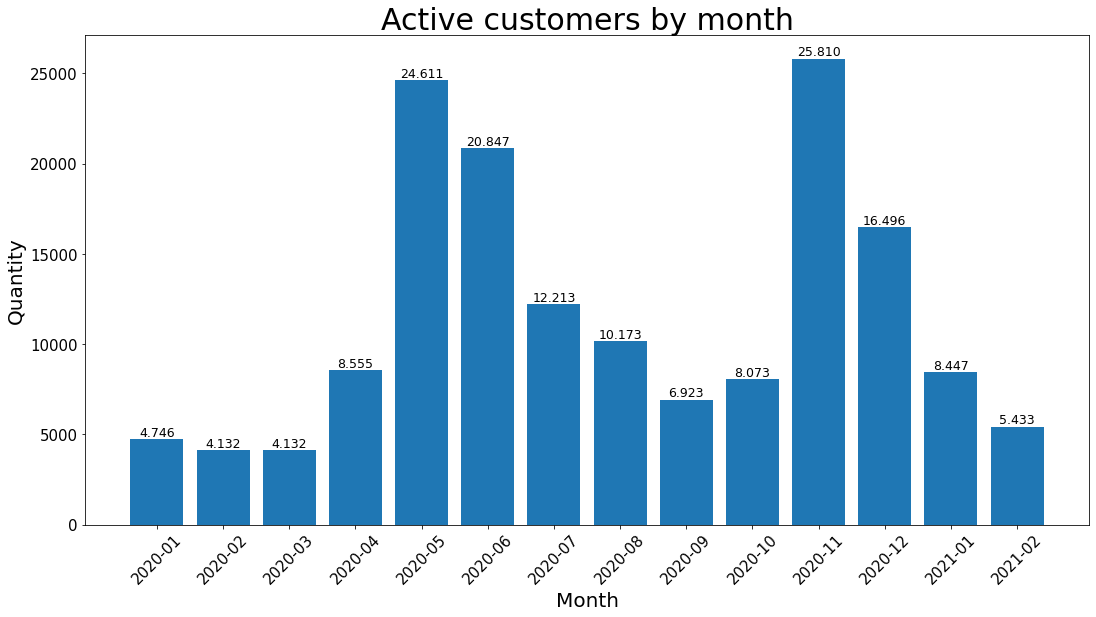

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))

fig.set_facecolor('white')

ax.set_title('Active customers by month', fontsize = 30)
ax.set_ylabel('Quantity', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Month', fontsize=20)
ax.tick_params(axis='x', labelsize=15, rotation=45)

ax.bar(mothly_active_customers['ANO_MES'],
        mothly_active_customers['COD_CLIENTE'])

rects = ax.patches
labels = ['{:,}'.format(mothly_active_customers['COD_CLIENTE'][i]).replace(',','.') for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12.5
    )

plt.show()

## New customers

In [ ]:
print(pedidos.shape)
pedidos.ANO_MES.unique()

(293126, 12)


array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02'], dtype=object)

In [ ]:
print(len(pedidos.COD_CLIENTE.unique()))

144416


In [ ]:
list_func = {'DATA_VENDA' : ['min', 'max'],
             'PEDIDO' : 'count'}
new_customers = pedidos.drop_duplicates('PEDIDO').groupby(['COD_CLIENTE'],as_index=False).agg(list_func)
new_customers.columns = ['_'.join(col).rstrip('_').upper() for col in new_customers.columns.values]
new_customers['DELTA_VENDA'] = (new_customers['DATA_VENDA_MAX'] - new_customers['DATA_VENDA_MIN']).dt.days

In [ ]:
new_customers = pedidos.drop_duplicates(subset=['PEDIDO']).merge(new_customers, 
                                                                 how='left', 
                                                                 on = 'COD_CLIENTE')

In [ ]:
def calc_days_last_buy(dataset, cod, date):
  
  dt_temp = dataset[(dataset['COD_CLIENTE'] == cod)\
                    & (dataset['DATA_VENDA'] < date)].DATA_VENDA.max()

  count_days = (date - dt_temp).days

  if count_days is np.nan:
    count_days = 0

  return count_days

In [ ]:
new_customers['LAST_BUY'] = new_customers['DELTA_VENDA']
new_customers.loc[new_customers['PEDIDO_COUNT'] > 2,'LAST_BUY'] = new_customers[new_customers['PEDIDO_COUNT'] > 2].apply(lambda x : calc_days_last_buy(pedidos, x.COD_CLIENTE, x.DATA_VENDA), axis=1)

In [ ]:
new_customers.drop_duplicates('PEDIDO').shape

(169546, 17)

In [ ]:
new_customers.loc[(new_customers['LAST_BUY']==0),'TIPO_CLIENTE'] = 'New customer'

new_customers.loc[(new_customers['LAST_BUY']>0)\
                  &(new_customers['LAST_BUY']<=180),'TIPO_CLIENTE'] = 'Old customer'

new_customers.loc[(new_customers['LAST_BUY']>180),'TIPO_CLIENTE'] = 'New customer with recurrence'                

In [ ]:
new_customers_plot = new_customers.pivot_table(index=['ANO_MES'],columns=['TIPO_CLIENTE'],values='PEDIDO',aggfunc='count')

In [ ]:
new_customers_plot.head()

TIPO_CLIENTE,New customer,New customer with recurrence,Old customer
ANO_MES,,,
2020-01,4207,244,488
2020-02,3541,213,520
2020-03,3480,202,559
2020-04,7385,301,1085
2020-05,21654,642,3153


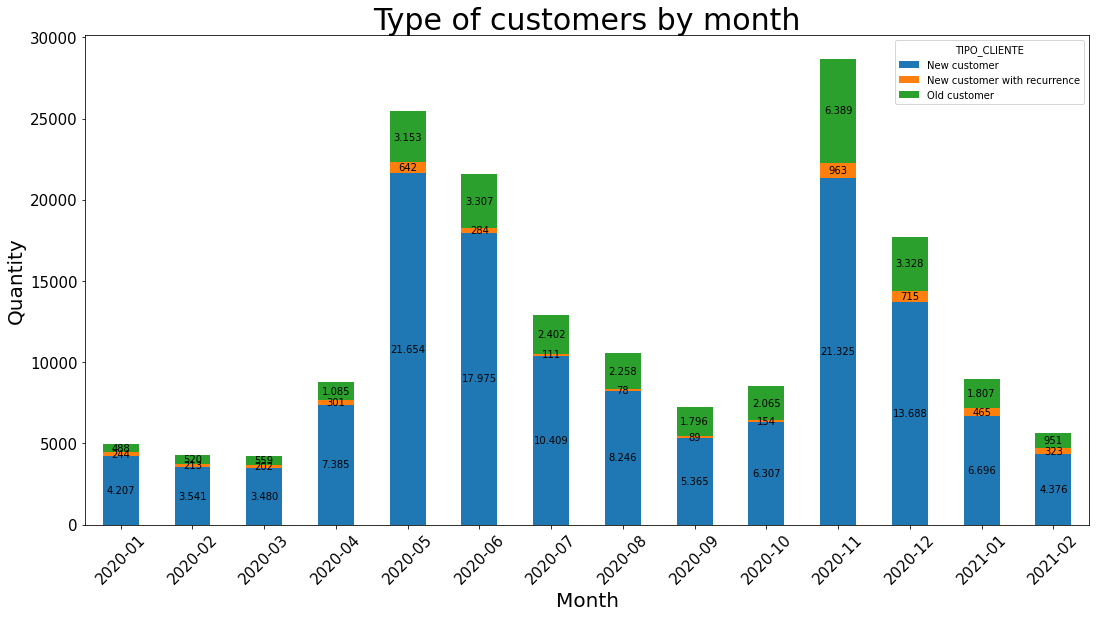

In [ ]:
# January is considering all customers are newers or recurrent in the month, because don't have more history than that

ax = new_customers_plot.plot(kind='bar', stacked= True, figsize=(18,9))

ax.figure.set_facecolor('white')
ax.set_title('Type of customers by month', fontsize = 30)
ax.set_ylabel('Quantity', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Month', fontsize=20)
ax.tick_params(axis='x', labelsize=15, rotation=45)

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = ['{:,.0f}'.format(v.get_height()).replace(',','.') if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

## Marketing channels analysis

In [ ]:
media_spend.head()

,Dia,Facebook Ads,Google Ads
0,2020-01-01,620.02,987.46
1,2020-01-02,596.95,1165.32
2,2020-01-03,691.31,876.76
3,2020-01-04,554.15,804.85
4,2020-01-05,696.08,899.13


In [ ]:
print(traffic.PEDIDO_ERP.shape)
print(traffic.PEDIDO_ERP.drop_duplicates().shape)

(172031,)
(172031,)


In [ ]:
media_spend.head()

,Dia,Facebook Ads,Google Ads
0,2020-01-01,620.02,987.46
1,2020-01-02,596.95,1165.32
2,2020-01-03,691.31,876.76
3,2020-01-04,554.15,804.85
4,2020-01-05,696.08,899.13


In [ ]:
info_produto.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,A10001G,21.1,BASICO
1,A10002M,21.1,BASICO
2,A10003M,22.6,BASICO
3,A10004P,22.6,BASICO
4,A10005M,22.6,BASICO


In [ ]:
print(pedidos.shape)

pedidos_2 = pedidos.merge(traffic, 
                        how='left',
                        on='PEDIDO_ERP')

print(pedidos_2.shape)

pedidos_3 = pedidos_2.merge(info_produto, 
                        how='left',
                        on='PRODUTO')

print(pedidos_3.shape)

(293126, 12)
(293126, 13)
(293126, 15)


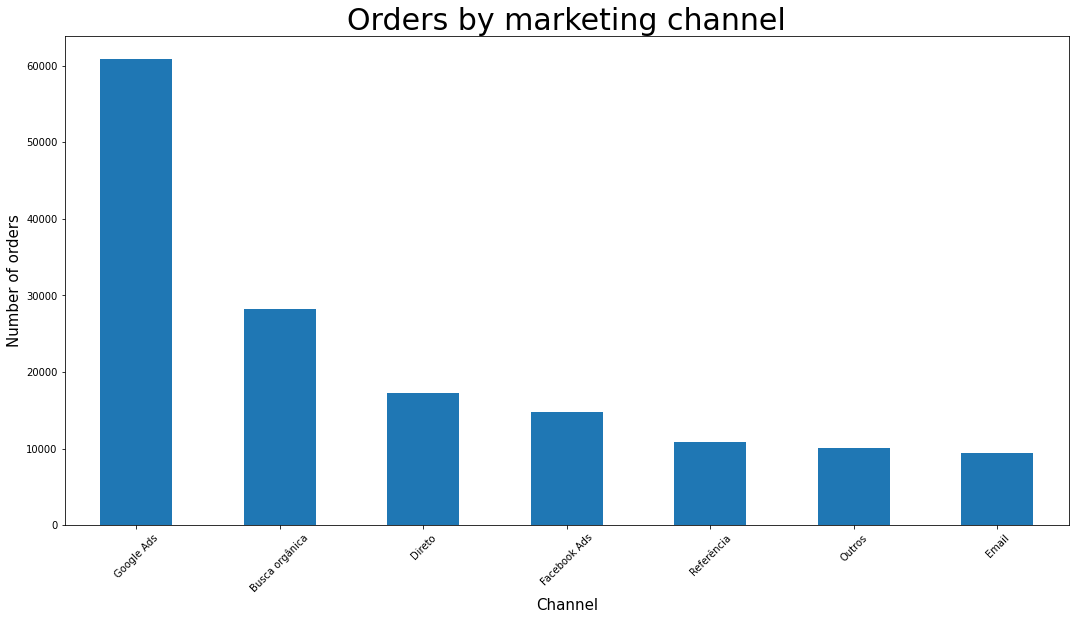

In [ ]:
# Marketing channel with null is the third more commom... There is a relevant problem in dataset
# But, for continue now, will assume this nothing is distributed in the another possibilities
## At the end will analyse this better, and understand possible correlations

ax = pedidos_2.drop_duplicates(subset=['PEDIDO_ERP']).CANAL_MARKETING.value_counts().plot(kind='bar',figsize=(18,9),rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Orders by marketing channel', fontsize=30)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_xlabel('Channel', fontsize=15)

plt.show()

Google Ads is who bring the highest number of orders

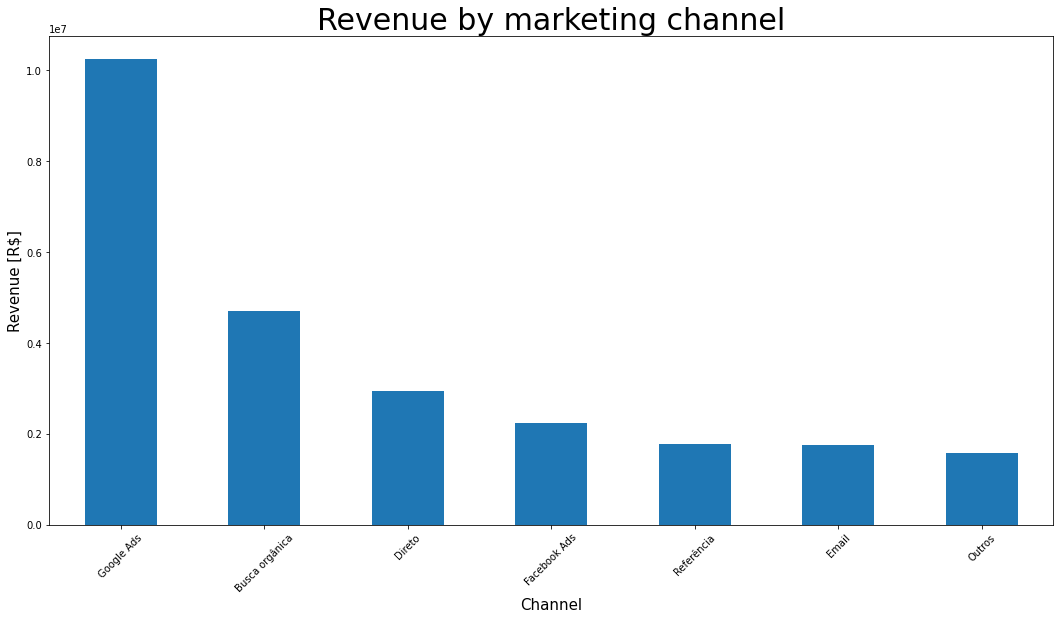

In [ ]:
ax = pedidos_2.groupby('CANAL_MARKETING').RECEITA.sum().sort_values(ascending=False).plot(kind='bar',figsize=(18,9),rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Revenue by marketing channel', fontsize=30)
ax.set_ylabel('Revenue [R$]', fontsize=15)
ax.set_xlabel('Channel', fontsize=15)

plt.show()

Google Ads bring highest values of revenue

In [ ]:
pedidos_3['CUSTO_PEDIDO'] = pedidos_3['CUSTO_MERCADORIA'] * pedidos_3['QTDE'] + (pedidos_3['CUSTO_FRETE'] - pedidos_3['FRETE_PAGO_CLIENTE'])
list_agg = {'RECEITA' : 'sum',
            'CUSTO_PEDIDO' : 'sum'}

channel_revenue = pedidos_3.groupby(['CANAL_MARKETING','ANO_MES'],as_index=False).agg(list_agg)
list_agg = {'Facebook Ads' : 'sum',
            'Google Ads' : 'sum'}
media_spend['ANO_MES'] = media_spend['Dia'].apply(lambda x : format(x,'%Y-%m'))

media_spend_monthly = media_spend.groupby('ANO_MES', as_index=False).agg(list_agg)
media_spend_monthly = media_spend_monthly.melt(id_vars=['ANO_MES'],value_vars=['Facebook Ads','Google Ads'], value_name='CUSTO_MARKETING', var_name='CANAL_MARKETING')
channel_margin = channel_revenue.merge(media_spend_monthly,
                                       how='left',
                                       on=['CANAL_MARKETING','ANO_MES'])

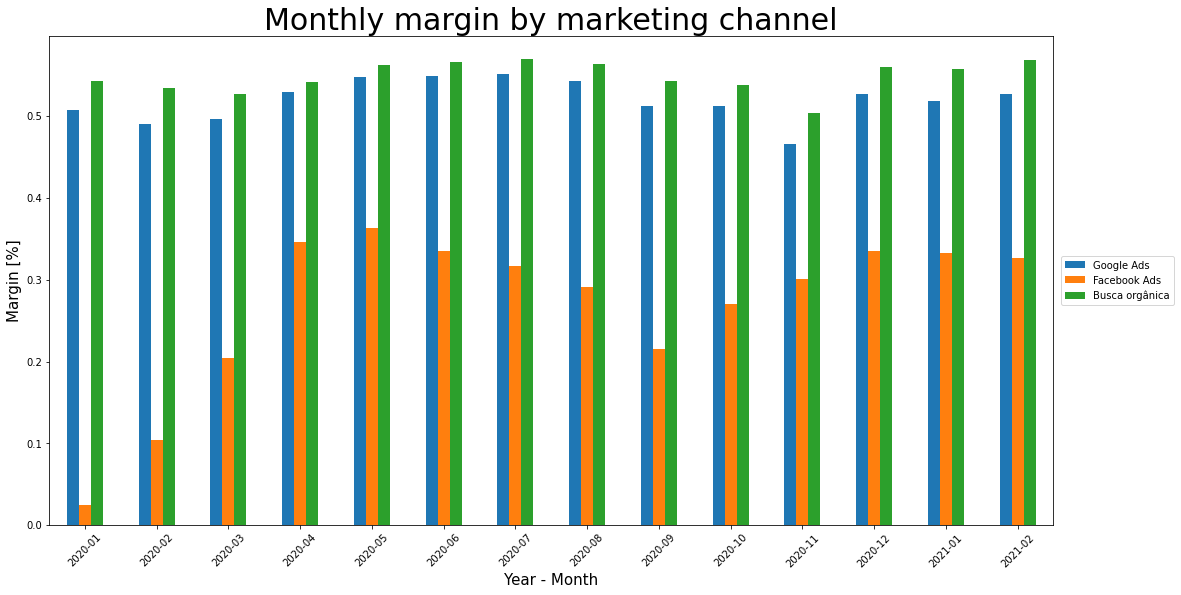

In [ ]:
channel_margin = channel_margin.fillna(0)
channel_margin['MARGEM'] = (channel_margin['RECEITA'] - (channel_margin['CUSTO_PEDIDO'] + channel_margin['CUSTO_MARKETING']))*(1-income_taxes)/channel_margin['RECEITA']

df_plot = channel_margin.pivot_table(index='ANO_MES',columns='CANAL_MARKETING',values='MARGEM')

ax = df_plot[['Google Ads','Facebook Ads','Busca orgânica']].plot(kind='bar', 
                  figsize=(18,9),
                  rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Monthly margin by marketing channel', fontsize=30)
ax.set_ylabel('Margin [%]', fontsize=15)
ax.set_xlabel('Year - Month', fontsize=15)

plt.legend(loc='center right', bbox_to_anchor=(1.125, 0.5))

plt.show()

The recomendation is change politcs of investment in markentig channels, rising spendings in Google Ads. Futhermore, review if the kind of promotion used in Facebook Ads can be redraw, or test other options more actratives (try A/B some tests).

## Recurrence

In [ ]:
pedidos_4 = pedidos_3.merge(customers,
                            how='left',
                            on='COD_CLIENTE')

Text(0.5, 0, 'UF')

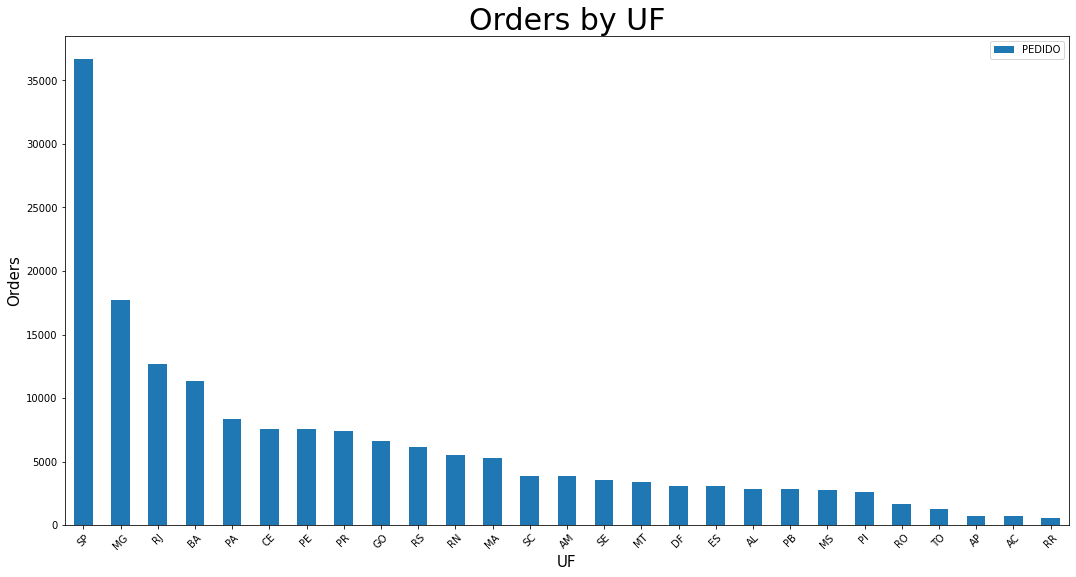

In [ ]:
ax = pedidos_4.drop_duplicates(subset=['PEDIDO'])\
                .groupby(['UF'],as_index=False)\
                .PEDIDO\
                .count()\
                .sort_values('PEDIDO',ascending=False)\
                .plot(kind='bar',
                      x='UF',
                      y='PEDIDO',
                      figsize=(18,9),
                      rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Orders by UF', fontsize=30)
ax.set_ylabel('Orders', fontsize=15)
ax.set_xlabel('UF', fontsize=15)

Mean:  37.501
Median:  36.0


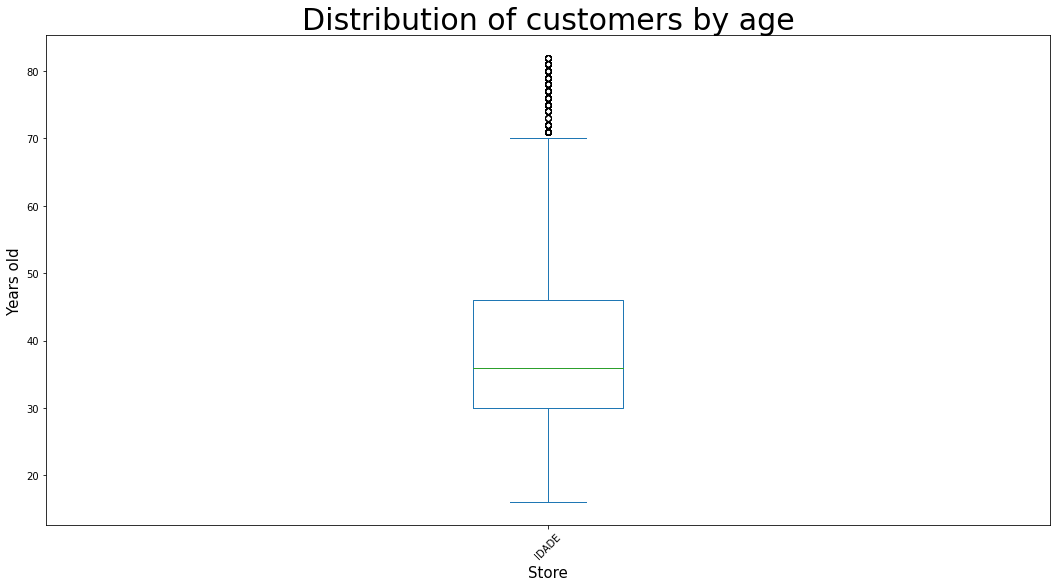

In [ ]:
ax = pedidos_4.drop_duplicates(subset=['PEDIDO'])\
                .IDADE\
                .plot(kind='box',
                      figsize=(18,9),
                      rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Distribution of customers by age', fontsize=30)
ax.set_ylabel('Years old', fontsize=15)
ax.set_xlabel('Store', fontsize=15)

print('Mean: ', round(pedidos_4.drop_duplicates(subset=['PEDIDO']).IDADE.mean(),3))
print('Median: ', pedidos_4.drop_duplicates(subset=['PEDIDO']).IDADE.median())

plt.show()

Mean:  7731.512
Median:  7680.265


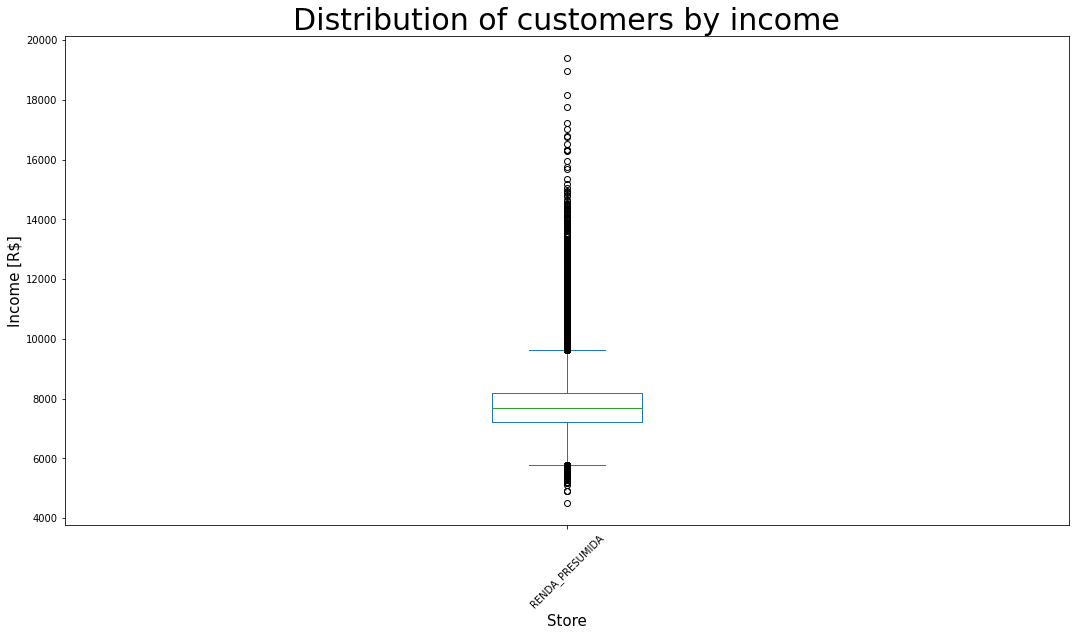

In [ ]:
ax = pedidos_4[pedidos_4['RENDA_PRESUMIDA']<20000].drop_duplicates(subset=['PEDIDO'])\
                .RENDA_PRESUMIDA\
                .plot(kind='box',
                      figsize=(18,9),
                      rot=45)

ax.figure.set_facecolor('white')
ax.set_title('Distribution of customers by income', fontsize=30)
ax.set_ylabel('Income [R$]', fontsize=15)
ax.set_xlabel('Store', fontsize=15)

print('Mean: ', round(pedidos_4.drop_duplicates(subset=['PEDIDO']).RENDA_PRESUMIDA.mean(),3))
print('Median: ', pedidos_4.drop_duplicates(subset=['PEDIDO']).RENDA_PRESUMIDA.median())

plt.show()

Tipically, the customers from store lives in Brazil Southeast region, have between 30 and 45 years old and have an income of  7.500,00 R$.

## Margin of each product

In [ ]:
pedidos_4['MARGEM_PEDIDO'] = (pedidos_4['RECEITA'] - pedidos_4['CUSTO_PEDIDO'])*(1-income_taxes)/pedidos_4['RECEITA']

In [ ]:
print('Margin %: ', round(pedidos_4['MARGEM_PEDIDO'].mean()*100,2))

Margin %:  50.67


In [ ]:
list_agg = {'MARGEM_PEDIDO' : 'mean',
            'RECEITA' : 'sum'}

pedidos_4.groupby('LINHA_PRODUTO').agg(list_agg).sort_values('MARGEM_PEDIDO',ascending=False)

,MARGEM_PEDIDO,RECEITA
LINHA_PRODUTO,,
COMPLEMENTOS,0.588865,6955.85
FASHION,0.546151,4689459.79
ACESSORIOS,0.525496,9582887.04
BOLSAS,0.514917,4171373.50
TECH,0.488119,1957321.33
BASICO,0.477787,7444775.40


In [ ]:
pedidos_4.groupby(['PRODUTO','LINHA_PRODUTO']).agg(list_agg).sort_values('MARGEM_PEDIDO').head(25)

,,MARGEM_PEDIDO,RECEITA
PRODUTO,LINHA_PRODUTO,,
E10717Y,ACESSORIOS,-0.854331,3597.82
E10470Y,BASICO,-0.787430,62692.56
E10369Y,ACESSORIOS,-0.336388,8139.08
B10112,BASICO,-0.276897,17003.70
B10114,BASICO,-0.257216,7430.80
E10213Y,BOLSAS,-0.254900,6614.21
B10115,BASICO,-0.231274,3579.51
B10116,BASICO,-0.204640,7470.86
B10113,BASICO,-0.202493,1839.53


The recommendation is withdraw products with negative margin immediately, progressively withdraw of products with margin lower than mean margin (50%). The focus must be on fashion, purses, bags, accessories and complements.